In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("weatherAUS.csv")
df["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [5]:
#split the data 

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

TRAINING DATA PRE-PROCESSING¶
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.

As such, data pre-processing addresses:

Assumptions about data shape
Incorrect data types
Outliers or errors
Missing values
Categorical variables

In [6]:
#data shape

print(train_df.shape)

(174003, 24)


In [7]:
#view first few rows

train_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
33861,2021-03-21,NorahHead,19.3,20.5,108.2,NaN,NaN,E,69.0,ENE,...,100.0,1023.0,1022.6,NaN,NaN,19.9,18.3,Yes,49.2,Yes
16067,2010-07-02,CoffsHarbour,8.3,12.9,0.0,1.4,0.0,NNW,17.0,WNW,...,95.0,1026.5,1024.4,7.0,8.0,11.5,11.7,No,7.2,Yes
45801,2010-01-07,Richmond,19.5,24.4,0.2,NaN,NaN,E,30.0,SW,...,59.0,1018.3,1016.7,NaN,NaN,21.2,24.1,No,0.6,No
13581,2019-03-10,Cobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123291,2022-05-11,Mildura,9.1,15.8,1.8,1.3,NaN,SE,39.0,ESE,...,100.0,1023.9,1019.8,8.0,8.0,13.0,14.5,Yes,NaN,NaN


In [8]:
#data info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174003 entries, 33861 to 121958
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           174003 non-null  object 
 1   Location       174003 non-null  object 
 2   MinTemp        170920 non-null  float64
 3   MaxTemp        171003 non-null  float64
 4   Rainfall       168701 non-null  float64
 5   Evaporation    76046 non-null   float64
 6   Sunshine       69154 non-null   float64
 7   WindGustDir    161238 non-null  object 
 8   WindGustSpeed  161352 non-null  float64
 9   WindDir9am     160350 non-null  object 
 10  WindDir3pm     166388 non-null  object 
 11  WindSpeed9am   170489 non-null  float64
 12  WindSpeed3pm   167537 non-null  float64
 13  Humidity9am    169919 non-null  float64
 14  Humidity3pm    166620 non-null  float64
 15  Pressure9am    154872 non-null  float64
 16  Pressure3pm    154898 non-null  float64
 17  Cloud9am       95877 non-null 

Missing Data
From the entry totals above, there appears to be missing data. A heatmap will help better visualize what features as missing the most information.

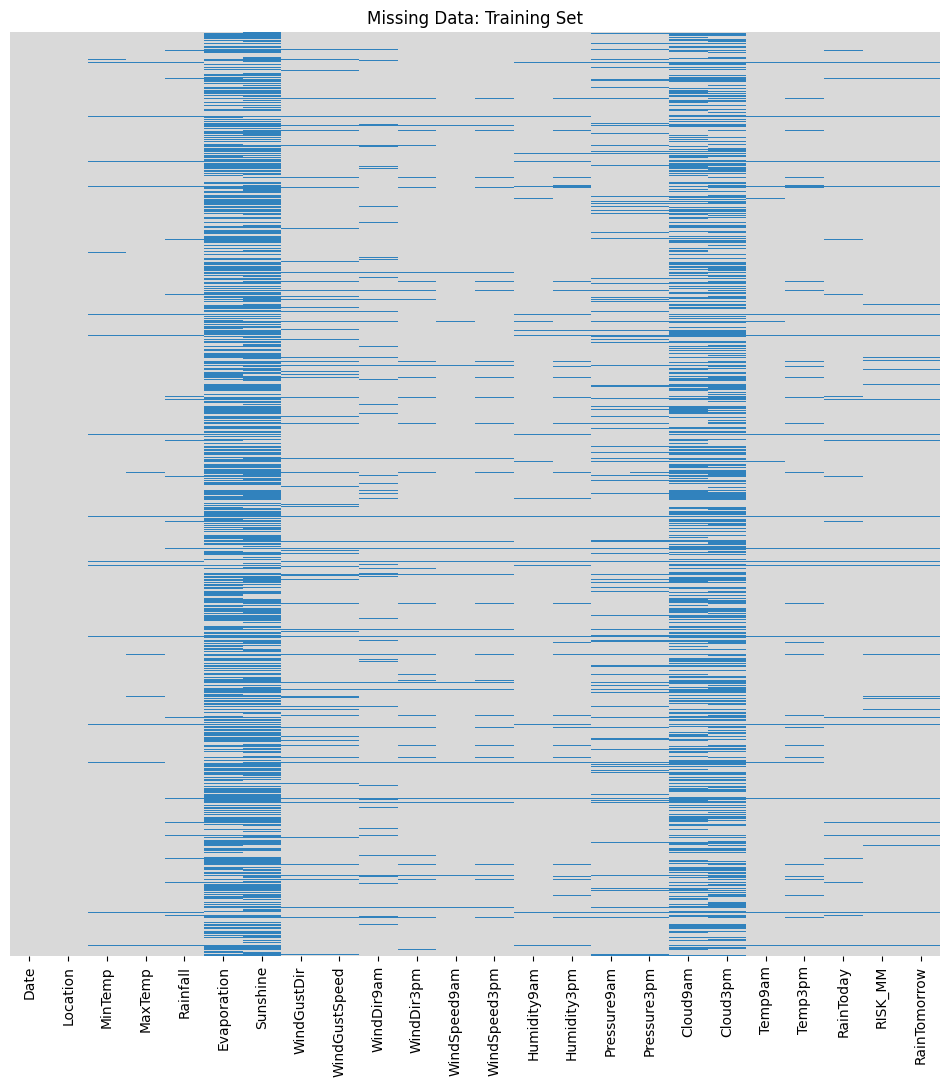

In [11]:
#heatmap
plt.figure(figsize=(12,12))
sns.heatmap(train_df.isnull(), yticklabels=False,cbar=False,cmap="tab20c_r")
plt.title('Missing Data: Training Set')
plt.show()

We can see that there are alot of variables has missing values.We first remove missing values of our target variable RainTomorrow.

In [16]:
# Remove rows where 'RainTomorrow' is NaN
df.dropna(subset=['RainTomorrow'], inplace=True)

# Print the number of missing values in 'RainTomorrow' to confirm
print(df["RainTomorrow"].isna().sum())

0


In [18]:
#identification of data types

num_var=df.select_dtypes(include=["number"]).columns
cat_var=df.select_dtypes(exclude=["number"]).columns.values

print(num_var)
print(cat_var)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow']


Engineering missing values in numerical variables

In [20]:
#imputation with the mean of the variable

imputer = SimpleImputer(strategy="mean")
df[num_var]=imputer.fit_transform(df[num_var])

print(df[num_var].isna().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64


Engineering missing values in categorical variables

In [23]:
#imputation with the most frequent value

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_var]=cat_imputer.fit_transform(df[cat_var])

print(df[cat_var].isna().sum())

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64


Explore categorical variables

In [24]:
# parse the date variable in to year-month-day
df['Date'] = pd.to_datetime(df['Date']) # parse from strings to date time
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# drop the date column
df.drop('Date', axis=1, inplace= True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.487833,7.627278,W,44.0,W,WNW,...,8.000000,4.694838,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.487833,7.627278,WNW,44.0,NNW,WSW,...,4.720682,4.694838,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.487833,7.627278,WSW,46.0,W,WSW,...,4.720682,2.000000,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.487833,7.627278,NE,24.0,SE,E,...,4.720682,4.694838,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.487833,7.627278,W,41.0,ENE,NW,...,7.000000,8.000000,17.8,29.7,No,0.2,No,2008,12,5


In [29]:
#explore target variable

# Count the occurrences of each value in the 'RainTomorrow' column
rain_tomorrow_counts = df["RainTomorrow"].value_counts()

# Print the counts
print(rain_tomorrow_counts)


RainTomorrow
No     187772
Yes     53207
Name: count, dtype: int64


C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2531337366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["RainTomorrow"], palette=["grey","lightgreen"])


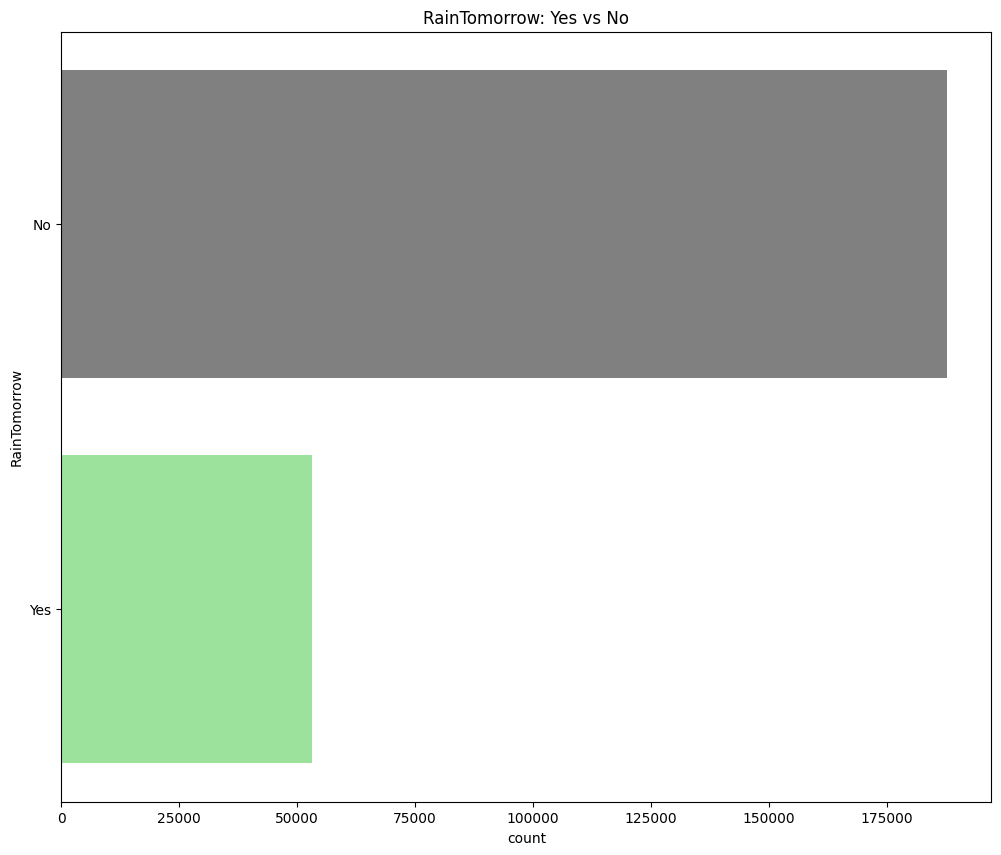

In [34]:
#target variable count plot

plt.figure(figsize=(12,10))
sns.countplot(df["RainTomorrow"], palette=["grey","lightgreen"])
plt.title("RainTomorrow: Yes vs No")
plt.show()

Explore numerical variable

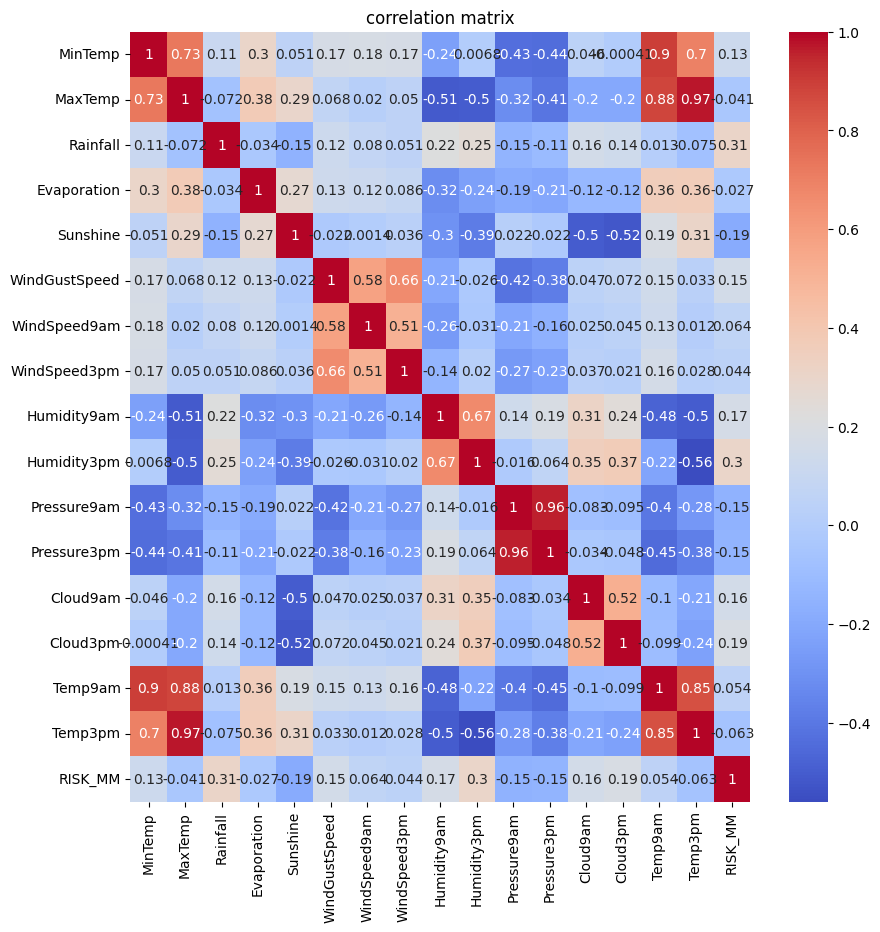

In [35]:
# correlation matrix

numeric_data=df[num_var]
corr_matrix=numeric_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()


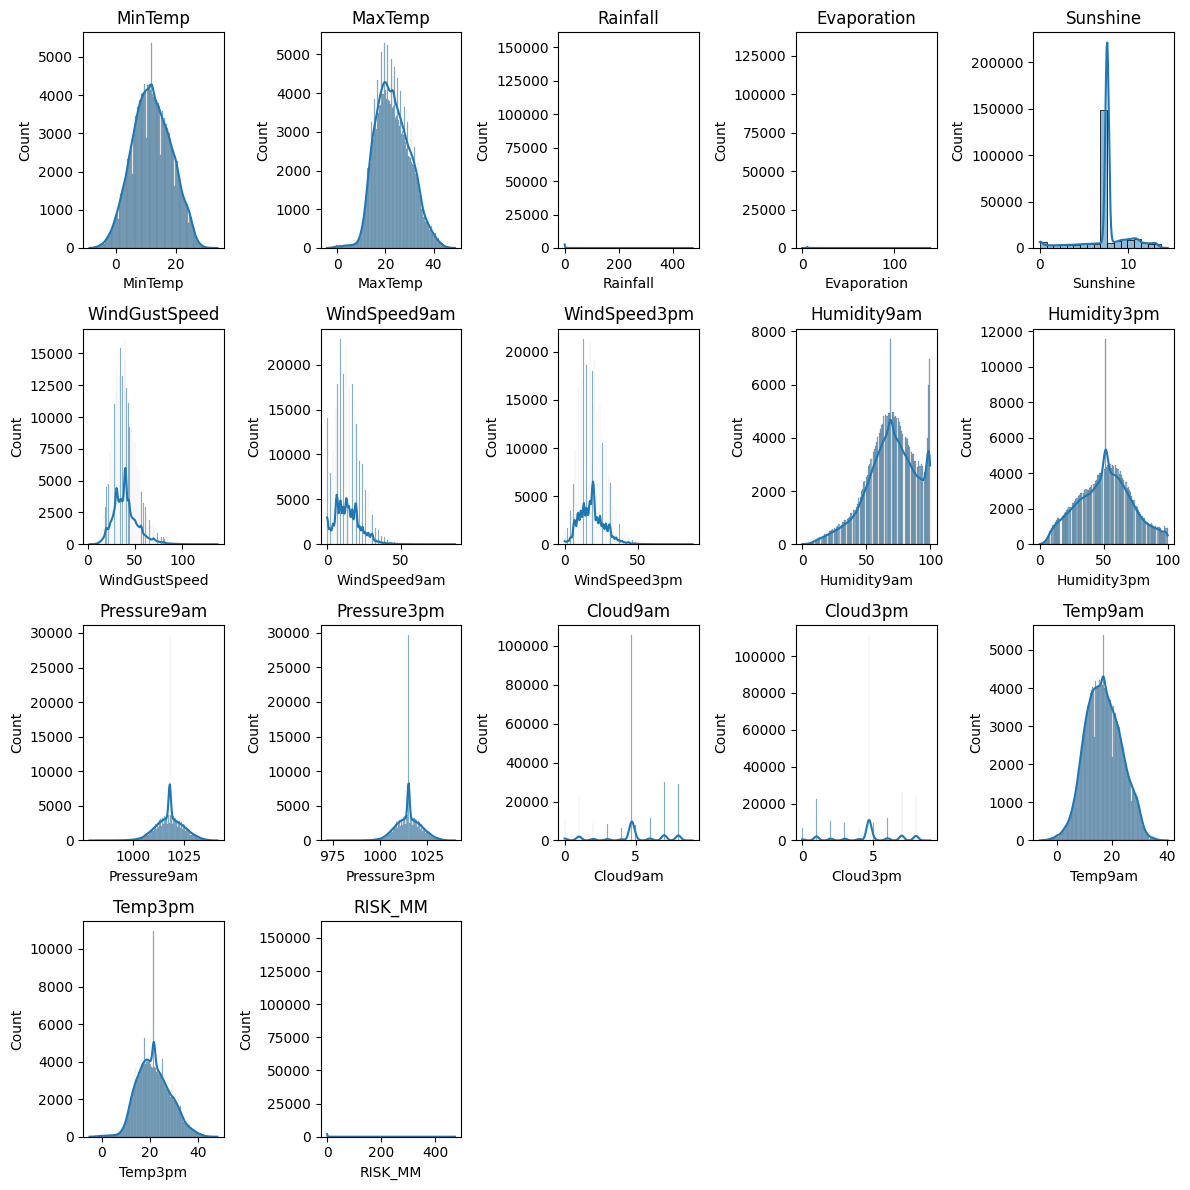

In [37]:
#distribution of numeric features

plt.figure(figsize=(12,12))
for i, col in enumerate(numeric_data):
    plt.subplot(4,5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [38]:

def detect_outliers(df):
    outliers = {}
    # Loop through each numerical column in the DataFrame
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices
    return outliers

# Example usage
outliers_dict = detect_outliers(df)
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}: {len(outliers)} rows")



Outliers in MinTemp: 124 rows
Outliers in MaxTemp: 1079 rows
Outliers in Rainfall: 44524 rows
Outliers in Evaporation: 103001 rows
Outliers in Sunshine: 97461 rows
Outliers in WindGustSpeed: 8776 rows
Outliers in WindSpeed9am: 2769 rows
Outliers in WindSpeed3pm: 3783 rows
Outliers in Humidity9am: 2403 rows
Outliers in Humidity3pm: 0 rows
Outliers in Pressure9am: 3904 rows
Outliers in Pressure3pm: 3335 rows
Outliers in Cloud9am: 71465 rows
Outliers in Cloud3pm: 64017 rows
Outliers in Temp9am: 616 rows
Outliers in Temp3pm: 1600 rows
Outliers in RISK_MM: 48350 rows
Outliers in Year: 0 rows
Outliers in Month: 0 rows
Outliers in Day: 0 rows


In [39]:
# Find aoutliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [40]:

_,_,_ = find_outliers('Rainfall')

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [44]:
# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
df[skewed_features] = np.log1p(df[skewed_features])



# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [45]:
#model training
# Split the dataset into features and target variable
X = df.drop('RainTomorrow', axis=1)  # Features
y = df['RainTomorrow']  # Target variable


In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#initialize random forrest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Accuracy: 1.0
Random Forest


Confusion Matrix
[[37593     0]
 [    0 10603]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     37593
         Yes       1.00      1.00      1.00     10603

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196

--------------------------------------------------------------------------------
Accuracy 100.0 %


logistic regression

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score


#import model
from sklearn.linear_model import LogisticRegression

#create instance of the model
lreg=LogisticRegression()

#pass the training data into model
lreg.fit(X_train,y_train)

##predict the model

y_pred_lreg= lreg.predict(X_test)

#confusion matrix

print("Logistic regression")
print("\n")
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_lreg))
print("---"*25)

#classification report
print("Classification Report")
print(classification_report(y_test, y_pred_lreg))

#accuracy
print("---"*25)
logreg_accuracy=round(accuracy_score(y_test, y_pred_lreg)*100,2)
print("Accuracy", logreg_accuracy, "%")

c:\Users\rohit\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression


Confusion matrix
[[37219   374]
 [  578 10025]]
---------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.98      0.99      0.99     37593
         Yes       0.96      0.95      0.95     10603

    accuracy                           0.98     48196
   macro avg       0.97      0.97      0.97     48196
weighted avg       0.98      0.98      0.98     48196

---------------------------------------------------------------------------
Accuracy 98.02 %


K-NEAREST NEIGHBORS¶
K-Nearest Neighbors (KNN) is used to classify new data points based on ‘distance’ to known data on a scatter plot with a two step process:

Find K nearest neighbors based on your distance metric
Let them all vote on the classification
KNN is different from the previous classifiers in that it requires variables to be standardized before the model is trained. This is because the KNN classifier predicts the class of a given test observation by identifying the observations nearest to it. Thus, the scale of the variables matters.

Any variables that are on a large scale will have a much larger effect on the distance between the observations (and hence, on the KNN classifier) than variables that are on a small scale. Therefore, everything should be standardized to the same scale when using k-nearest neighbors to classify

Decision tree



In [67]:
# Import model
from sklearn.tree import DecisionTreeClassifier

#create model object
dt_classifier=DecisionTreeClassifier()

#fit the model
dt_classifier.fit(X_train,y_train)

#predict
y_pred_dt=dt_classifier.predict(X_test)

#score it
print("decision tree")
print("\n")
print("confusion matrix")
print(classification_report(y_test, y_pred_dt))

#classsification report
print("--"*40)
print(classification_report(y_test, y_pred_dt))

#accuracy
print("---"*40)
dt_accuracy=round(accuracy_score(y_test, y_pred_dt)*100,2)
print("Accuracy", dt_accuracy,"%")

decision tree


confusion matrix
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     37593
         Yes       1.00      1.00      1.00     10603

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     37593
         Yes       1.00      1.00      1.00     10603

    accuracy                           1.00     48196
   macro avg       1.00      1.00      1.00     48196
weighted avg       1.00      1.00      1.00     48196

------------------------------------------------------------------------------------------------------------------------
Accuracy 100.0 %


best model

In [68]:
models=pd.DataFrame({"Model":["Logistic Regression", "Random Forrest", "Decisoin Tree"],
                     "Score":[logreg_accuracy, rf_accuracy, dt_accuracy ]})

models.sort_values(by="Score", ascending=False)

,Model,Score
1,Random Forrest,100.00
2,Decisoin Tree,100.00
0,Logistic Regression,98.02
